# Part 2: Predictive Analytics

***Author: Tapojoy De | Topics: Data Analytics, Predictive Analytics***

<p style="text-align:center;">
    <img src="images/pred_gears.jpg" alt="predictive-analytics" title="Predictive Analytics" width="800"><br>
    <center><i>Source : <a href="https://www.gettyimages.in/detail/illustration/machine-learning-and-artificial-intelligence-royalty-free-illustration/1264542084">Getty Images</a></i></center>
</p>

# Table of Contents

* [Background](#Background)
* [Import Libraries](#Import-Libraries)
* [Import Data](#Import-Data)
* [Feature Engineering](#Feature-Engineering)
    * [Target Variable: Annual Salary](#Target-Variable:-Annual-Salary)
    * [Predictor Variables](#Predictor-Variables)
        * [Customers' State](#Customers'-State)
        * [Average Transaction Amount](#Average-Transaction-Amount)
        * [Maximum Transaction Amount](#Maximum-Transaction-Amount)
        * [Average Weekly Transaction Count](#Average-Weekly-Transaction-Count)
        * [Transaction Days Count](#Transaction-Days-Count)
        * [High-value Transaction Count](#High-value-Transaction-Count)
        * [Median Balance](#Median-Balance)
        * [Age and Gender](#Age-and-Gender)
    * [Final Dataframe](#Final-Dataframe)
* [Explore Correlations](#Explore-Correlations)
* [Preprocessing](#Preprocessing)
    * [Train-Test Split](#Train-Test-Split)
    * [Column Transformer](#Column-Transformer)
* [Predicting Annual Salary](#Predicting-Annual-Salary)
    * [Linear Regression Model](#Linear-Regression-Model)
    * [Decision Tree Model](#Decision-Tree-Model)
* [Conclusion](#Conclusion)


## Background

**Objective :** To explore correlations between customer attributes, build a regression model and a decision-tree prediction model based on our findings.

**Dataset :** The dataset used in this task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers that contains purchases, recurring transactions, and salary transactions. The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data.

**Task list :**

- Identify the annual salary for each customer.

- Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that can be constructed or derived (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

- Build a simple regression model to predict the annual salary for each customer using the attributes identified above.

- Check accuracy of model and recommend if ANZ should use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes.

- For a challenge, build a decision-tree based model to predict salary and check if it performs better. Also explore how to accurately test the performance of this model.

## Import Libraries

Firstly, we will import all necessary libraries for data wrangling and machine learning.

In [1]:
# data wrangling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics # for frequency calculation

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

 Then, we will set parameters for better visualisations.

In [2]:
# better definition of plots
%config InlineBackend.figure_format = 'retina'

# "ggplot" (R Package) style plots
plt.style.use("ggplot")

# default plot dimensions
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['figure.dpi'] = 80

# view all columns of dataframe
pd.set_option('display.max_columns', None)

## Import Data

We will load the dataset `txn.pkl` that we saved in Task 1 and view the first 5 rows.

In [3]:
txn = pd.read_pickle("data/txn.pkl")
txn.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,month,day,hour,category
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,01:01:15,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,8,2,1,Purchase
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,01:13:45,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,8,2,1,Purchase
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,01:26:15,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,8,2,1,Purchase
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,01:38:45,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,8,2,1,Purchase
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,01:51:15,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,8,2,1,Purchase


We will take a look at the columns of this dataframe.

In [4]:
txn.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat', 'movement',
       'month', 'day', 'hour', 'category'],
      dtype='object')

The final four columns `month`, `day`, `hour`, `category` are the ones we created in the previous task.

## Feature Engineering

To model the annual salary, we will first compute the annual salariy for each customer. Following that, we will create features that can help us to predict the annual salary.

### Target Variable: Annual Salary

In the given scenario, the target or response variable to be predicted is the annual salary for each ANZ customer. To do that, firstly we will collect all the unique customer IDs and store them in a dataframe.

In [5]:
sal_df = pd.DataFrame({"customer_id": txn.customer_id.unique()})
sal_df.head()

,customer_id
0,CUS-2487424745
1,CUS-2142601169
2,CUS-1614226872
3,CUS-2688605418
4,CUS-4123612273


Next, we will go through each of the unique customer IDs and get the transactions that are related to salary payments(`PAY/SALARY`). Using the dates and amounts for these salary transactions for a customer, we will calculate the total amounts (salary payments) grouped by the dates. Next, we will count these unique salary payments and apply the following logic:
- if count is zero (i.e., no salary payments exist), we will append null values to blank frequency and amount lists.
- if count is non-zero (i.e., salary payments exist), we will calculate the days/gaps between each salary payment in order to find the payment frequency (e.g. weekly, fortnightly, etc.). Taking the maximum of those days, we will append it to the frequency list and taking the mode of the unique salary payments, we will append it to the amount list. 

>NOTE : 
>- Mode calculation for the salary amounts is based on the assumption that the most frequent salary payment is actually the amount that a customer gets paid regularly.
>- Mode calculation for the payment gaps gave rise to multiple mode values. So in this case, we chose to proceed with maximum calculation instead. 

To perform the whole process for all 100 customers, we will use a `for` loop to repeat.

In [6]:
df_freq = []
df_amt = []

for cust in range(len(sal_df)):
    sal = txn.loc[(txn.customer_id == sal_df.customer_id[cust]) & (txn.txn_description == 'PAY/SALARY'), ['date','amount']].groupby('date', as_index=False).sum()
    count = len(sal)
    
    if count == 0:
        df_freq.append(np.nan)
        df_amt.append(np.nan)
    else:
        payment_gap = []
        for date in range(len(sal)-1):
            payment_gap.append((sal.date[date+1] - sal.date[date]).days)
        df_freq.append(max(payment_gap))
        df_amt.append(statistics.mode(sal.amount))

After all the iterations, we will actually calculate the annual salary. We will achieve this by taking the salary amounts (obtained from the amount lists), dividing them by salary frequency (obtained from the frequency lists) and finally, multiplying the values by 365.25 (true no. of days in a year). We will save everything in a dataframe and take a look at the first 5 rows.

In [7]:
sal_df['sal_freq'] = df_freq
sal_df['sal_amt'] = df_amt
sal_df['annual_sal'] = (sal_df['sal_amt']/sal_df['sal_freq'])*365.25
sal_df.head()

,customer_id,sal_freq,sal_amt,annual_sal
0,CUS-2487424745,7,1013.67,52891.852500
1,CUS-2142601169,7,1002.13,52289.711786
2,CUS-1614226872,7,892.09,46547.981786
3,CUS-2688605418,14,2320.30,60534.969643
4,CUS-4123612273,7,1068.04,55728.801429


Looking at the `sal_freq` column, we can see that the first three customers are paid weekly, fourth customer is paid fortnightly, and again fifth customer is paid weekly.

We will visualise this distribution using a histogram plot.

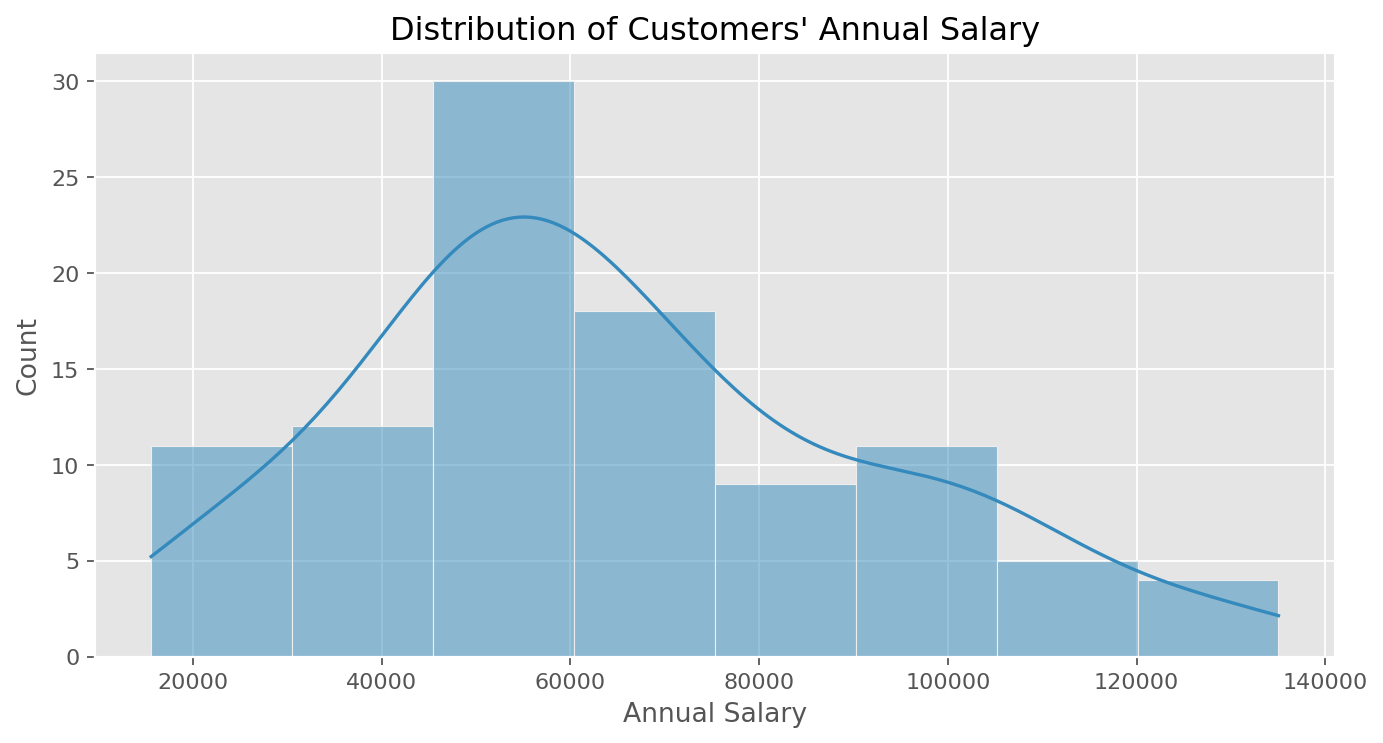

In [8]:
sns.histplot(sal_df.annual_sal, kde=True).set(xlabel="Annual Salary", title="Distribution of Customers' Annual Salary");

In [9]:
txn.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat', 'movement',
       'month', 'day', 'hour', 'category'],
      dtype='object')

### Predictor Variables

Now, we will construct/derive the following predictor features which can be useful for predicting the annual salary of customers :

- Customers' State
- Average Transaction Amount
- Maximum Transaction Amount
- Average Weekly Transaction Count
- Transaction Days Count
- High-value Transaction Count (over A$ 100)
- Median Balance

Also, we have the following features already available in the dataframe :
- Age
- Gender

We will first create a list of all unique customer IDs for later use.

In [10]:
unique_id = txn.customer_id.unique()

#### Customers' State

To find the states of customers' residence, we will assume that the customers live in the state where most of their transactions took place.

In [11]:
cust_state = []

for i in unique_id:
    array = txn.loc[txn.customer_id == i, 'merchant_state']
    cust_state.append(statistics.mode(array))

cust_state[:10]

['QLD', 'NSW', 'QLD', 'NSW', 'VIC', 'WA', 'NA', 'NA', 'NSW', 'NA']

#### Average Transaction Amount

We will get the amounts for each customer and calculate their respective mean values.

In [12]:
avg_amt = []

for i in unique_id:
    array = txn.loc[txn.customer_id == i, 'amount']
    avg_amt.append(array.mean())

avg_amt[:10]

[45.34877162629758,
 78.20610561056105,
 74.46501930501931,
 159.30418604651166,
 166.5083582089552,
 99.56965753424657,
 314.32429824561405,
 220.85247422680413,
 297.5103448275862,
 261.8914110429448]

#### Maximum Transaction Amount

We will collect the amounts for each customer and take the maximum of those amounts.

In [13]:
max_amt = []

for i in unique_id:
    array = txn.loc[txn.customer_id == i, 'amount']
    max_amt.append(max(array))

max_amt[:10]

[1452.21,
 2349.55,
 892.09,
 2320.3,
 1068.04,
 2840.15,
 2280.36,
 2639.76,
 3903.95,
 2588.01]

#### Average Weekly Transaction Count

Here, we will take the number of transactions made by a customer, divide it by unique no. of dates and multiply it by 7 to get the average weekly count of transactions.

In [14]:
avg_weekly_txn = []

for i in unique_id:
    array = txn.loc[txn.customer_id == i, 'date']
    avg_weekly_txn.append(round((len(array)/array.nunique())*7))

avg_weekly_txn[:10]

[48, 29, 24, 14, 21, 27, 12, 13, 14, 15]

#### Transaction Days Count

Here, we will use the date information to get the number of days a customer has made transactions.

In [15]:
txn_days = []

for i in unique_id:
    array = txn.loc[txn.customer_id == i, 'date']
    txn_days.append(array.nunique())

txn_days[:10]

[85, 74, 76, 63, 44, 75, 68, 53, 57, 74]

#### High-value Transaction Count

We will filter any transactions that are over A$ 100 amount.

In [16]:
large_txn = []

for i in unique_id:
    count = 0
    array = txn.loc[txn.customer_id == i, 'amount']
    for amount in array:
        if amount > 100:
            count += 1
    large_txn.append(count)

large_txn[:10]

[22, 23, 22, 25, 32, 23, 27, 8, 28, 27]

#### Median Balance

For this feature, we will calculate the median values of balances for each customer.

In [17]:
med_bal = []

for i in unique_id:
    array = txn.loc[txn.customer_id == i, 'balance']
    med_bal.append(array.median())

med_bal[:10]

[1580.4,
 1132.66,
 3618.5,
 5616.63,
 6162.45,
 5893.355,
 13214.74,
 12992.23,
 12093.89,
 12794.13]

#### Age and Gender

Lastly, we will include both the `age` and `gender` columns from the original dataframe, and apply mode calculation in these cases.

In [18]:
age = []

for i in unique_id:
    array = txn.loc[txn.customer_id == i, 'age']
    age.append(statistics.mode(array))

age[:10]

[26, 38, 40, 20, 43, 27, 40, 19, 23, 43]

In [19]:
gender = []

for i in unique_id:
    array = txn.loc[txn.customer_id == i, 'gender']
    gender.append(statistics.mode(array))

gender[:10]

['F', 'M', 'F', 'M', 'F', 'F', 'M', 'M', 'M', 'M']

### Final Dataframe

Now that all predictor variables have been defined, we will combine everything together into a single dataframe `txn_features`.

In [20]:
txn_features = pd.DataFrame({'customer_id': unique_id,
                             'cust_state': cust_state,
                             'avg_amt': avg_amt,
                             'max_amt': max_amt,
                             'avg_weekly_txn': avg_weekly_txn,
                             'txn_days': txn_days,
                             'large_txn': large_txn,
                             'med_bal': med_bal,
                             'age': age,
                             'gender': gender})

txn_features.head()

,customer_id,cust_state,avg_amt,max_amt,avg_weekly_txn,txn_days,large_txn,med_bal,age,gender
0,CUS-2487424745,QLD,45.348772,1452.21,48,85,22,1580.40,26,F
1,CUS-2142601169,NSW,78.206106,2349.55,29,74,23,1132.66,38,M
2,CUS-1614226872,QLD,74.465019,892.09,24,76,22,3618.50,40,F
3,CUS-2688605418,NSW,159.304186,2320.30,14,63,25,5616.63,20,M
4,CUS-4123612273,VIC,166.508358,1068.04,21,44,32,6162.45,43,F


Subsequently, we will concatenate the annual salary (target variable) for each customer to form the final dataframe, which we will be using for our modeling further.

In [21]:
final_df = pd.concat([txn_features, sal_df.annual_sal], axis=1)
final_df.head()

,customer_id,cust_state,avg_amt,max_amt,avg_weekly_txn,txn_days,large_txn,med_bal,age,gender,annual_sal
0,CUS-2487424745,QLD,45.348772,1452.21,48,85,22,1580.40,26,F,52891.852500
1,CUS-2142601169,NSW,78.206106,2349.55,29,74,23,1132.66,38,M,52289.711786
2,CUS-1614226872,QLD,74.465019,892.09,24,76,22,3618.50,40,F,46547.981786
3,CUS-2688605418,NSW,159.304186,2320.30,14,63,25,5616.63,20,M,60534.969643
4,CUS-4123612273,VIC,166.508358,1068.04,21,44,32,6162.45,43,F,55728.801429


## Explore Correlations

We will briefly explore all the correlations between annual salary and all predictor features, using a pairwise plot.

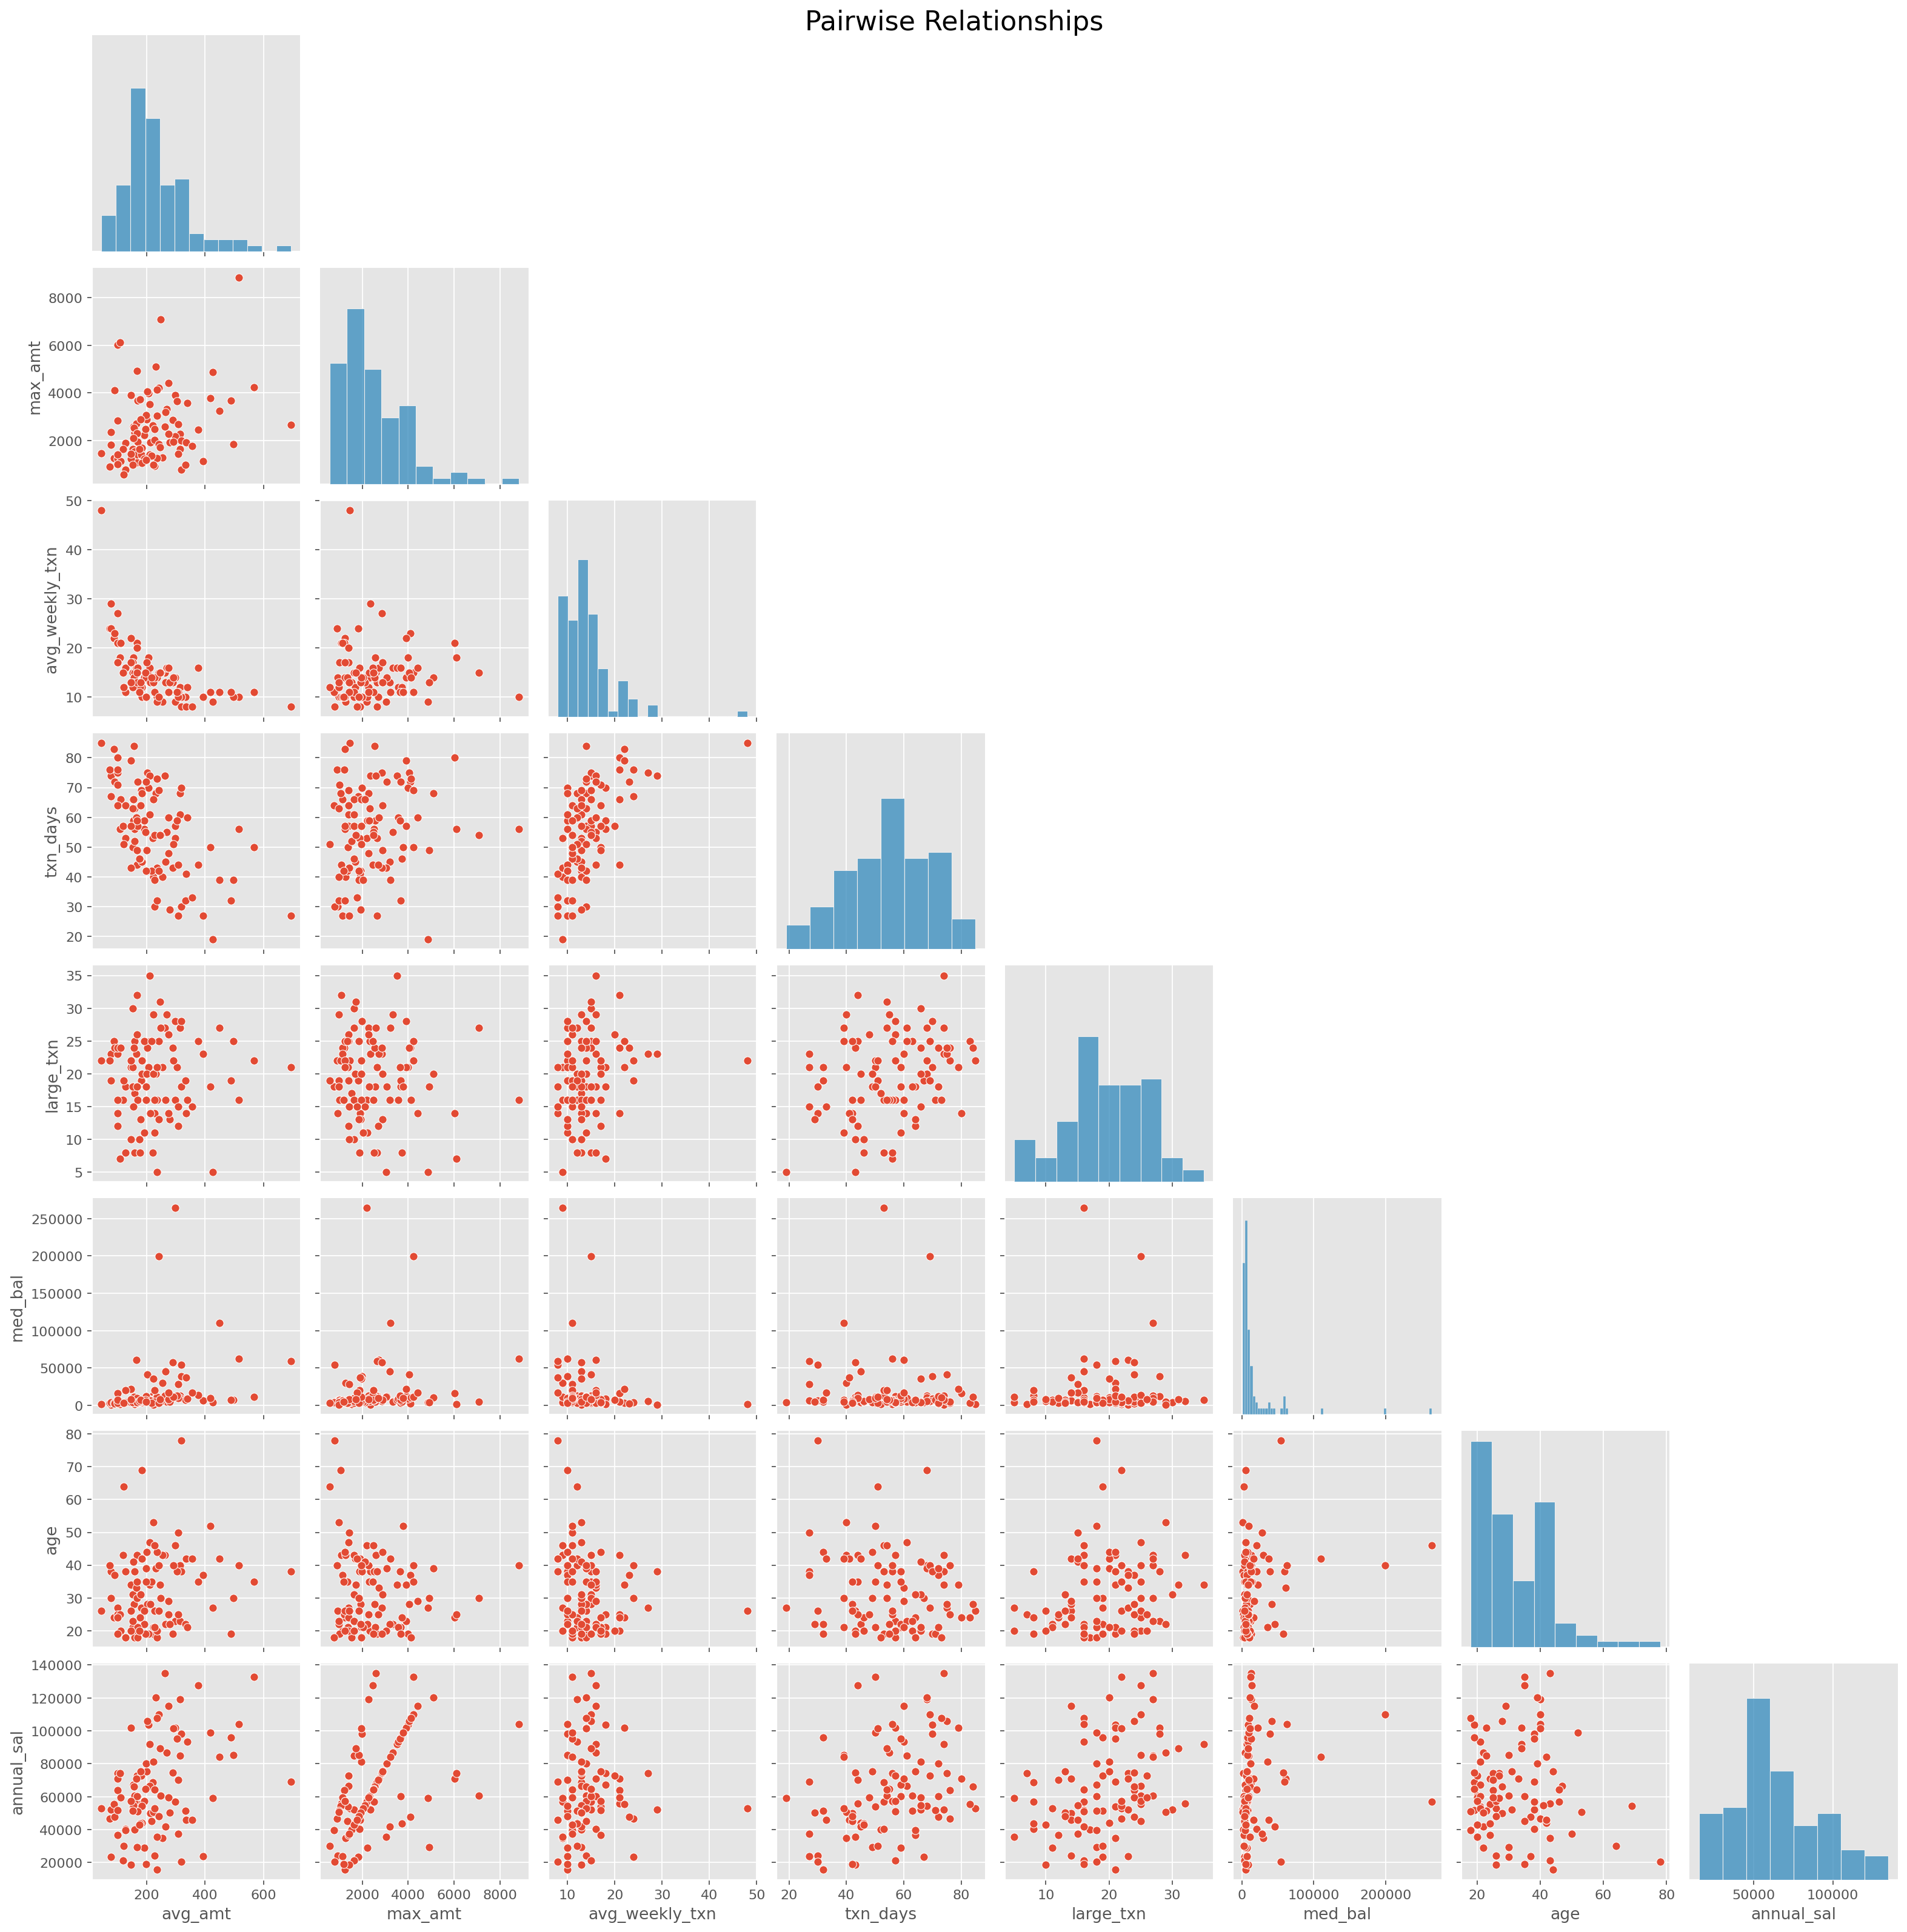

In [40]:
g = sns.pairplot(final_df.drop(['customer_id'], axis=1), corner=True)
g.fig.suptitle("Pairwise Relationships", y=1, size=20);

We can further visualise the correlation values using a correlation heatmap.

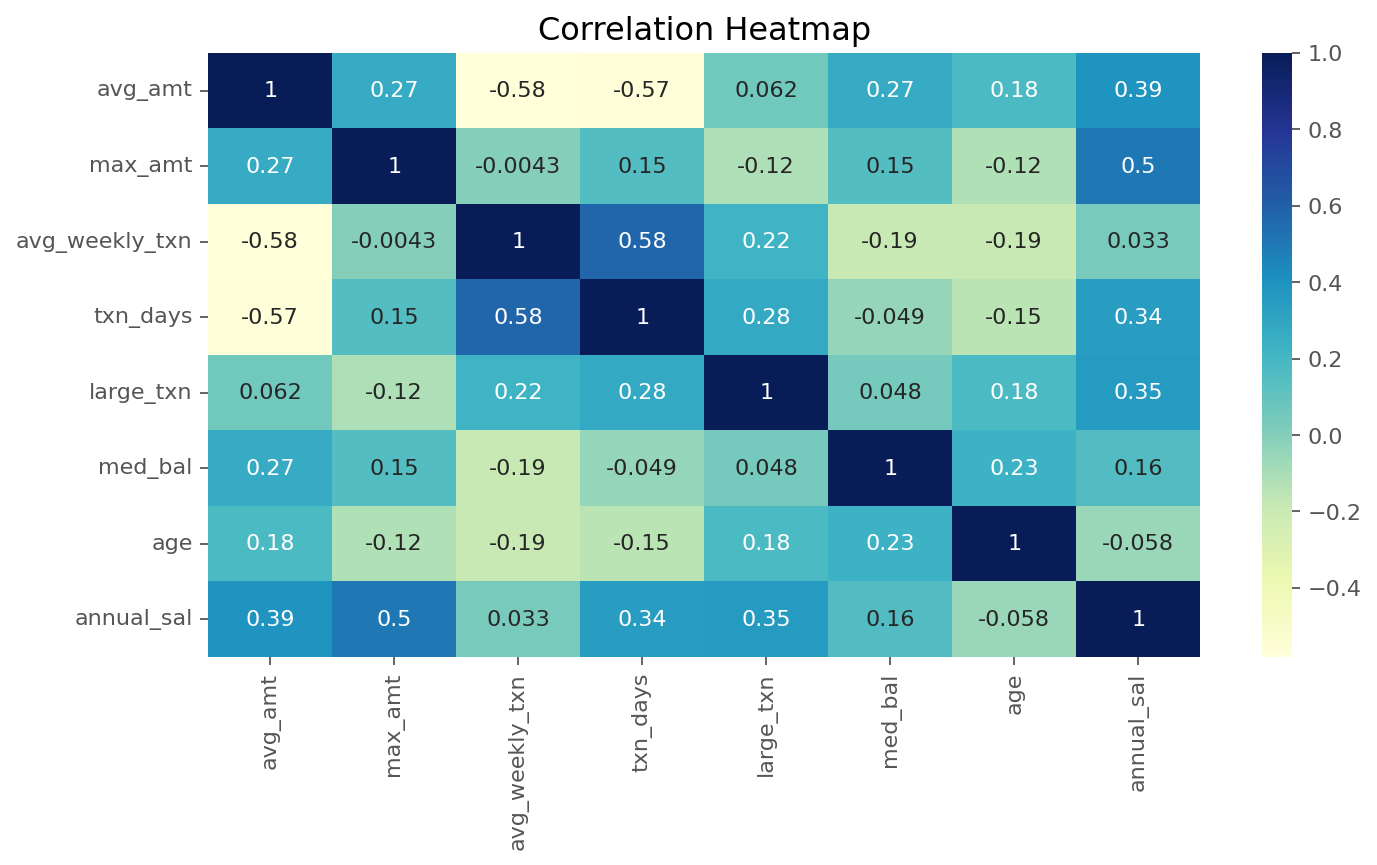

In [39]:
sns.heatmap(final_df.drop(['customer_id'], axis=1).corr(), cmap="YlGnBu", annot=True).set(title="Correlation Heatmap")
plt.show()

From the above plots, we can make the following interesting observations :

- Annual salary has a strong positive correlation with maximum transaction amount (0.5), and somewhat positive correlations with average transaction amount (0.39), transaction days count (0.34) and high-value transaction count (0.35).

- Average weekly transactions has got a very strong positive correlation with transaction days (0.58).

- Average transaction amount has a strong negative correlation with the transaction days (-0.58).

## Preprocessing

We will check for any missing values in the final dataframe.

In [23]:
final_df.isnull().sum()

customer_id       0
cust_state        0
avg_amt           0
max_amt           0
avg_weekly_txn    0
txn_days          0
large_txn         0
med_bal           0
age               0
gender            0
annual_sal        0
dtype: int64

As we can see, there are no missing values. Therefore, we will continue with some minor preprocessing to get the dataframe all set for modeling.

### Train-Test Split

We will perform train and test split on our final dataframe, with 70% of the data in train set for model training and rest 30% in test set for evaluating the model predictions.

In [24]:
X = final_df.drop(['customer_id', 'annual_sal'], axis=1) # predictor columns
y = final_df.annual_sal # target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

print(f'Train set: {X_train.shape}, {y_train.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Train set: (70, 9), (70,)
Test set: (30, 9), (30,)


Examining the shapes of the train and test sets, we can confirm that there are 9 predictor columns and 1 target column in each set.

### Column Transformer

We will now check the data types of the predictor variables.

In [25]:
X.dtypes

cust_state         object
avg_amt           float64
max_amt           float64
avg_weekly_txn      int64
txn_days            int64
large_txn           int64
med_bal           float64
age                 int64
gender             object
dtype: object

Next, we will use the `select_dtypes()` function to select the column indexes that match different data types and save theme as lists. We are interested in determining the lists of numerical and categorical columns, which we will use later for column transformer.

In [26]:
num_cols = list(X.select_dtypes(include='number').columns)
cat_cols = list(X.select_dtypes(include='object').columns)
print(f"Numerical features: {num_cols}\nCategorical features: {cat_cols}")

Numerical features: ['avg_amt', 'max_amt', 'avg_weekly_txn', 'txn_days', 'large_txn', 'med_bal', 'age']
Categorical features: ['cust_state', 'gender']


We can see that `cust_state` and `gender` columns are categorical (object data-type), as they contain text. Since models are unable to train on variables containing text, we will have to encode both of these columns using one-hot encoder. Additionally, in order to ensure that each feature has equal weighting in the final prediction, we will scale all numerical variables using a standard scaler. We will combine the encoder and scaler into a single column transformer that we will use during modeling.

In [27]:
col_transform = ColumnTransformer([
    ("one_hot", OneHotEncoder(sparse=False), cat_cols), # sparse=False to return an array & easier visualization
    ("std_scl", StandardScaler(), num_cols)])

## Predicting Annual Salary

Finally, we will build a pipeline using the column transformer and a machine learning model to predict the customers' annual salary. For this task, following models have been specified :
- Linear Regression model
- Decision Tree model

### Linear Regression Model

We will first instantiate a pipeline incorporating a linear regression model and the column transformer defined earlier.

In [28]:
lm = LinearRegression()
lm_pipe = Pipeline(steps=[('transform', col_transform), ('LR', lm)])

Now, we will fit the pipeline on the train set and predict the target for test set.

In [29]:
lm_pipe.fit(X_train, y_train)
lm_pred = lm_pipe.predict(X_test)

Now that the model has made predictions, we will evaluate the Root Mean Square Error (RMSE) values between those predictions and the actual target values in the test set.

In [30]:
print(f"RMSE: {round(np.sqrt(mean_squared_error(lm_pred, y_test)))}")

RMSE: 19904


### Decision Tree Model

Here, we will instantiate another pipeline for a decision tree model, fit it on the train set and predict the target variable for test set.

In [31]:
dt = DecisionTreeRegressor(random_state=999)
dt_pipe = Pipeline(steps=[('transform', col_transform), ('DT', dt)])

dt_pipe.fit(X_train, y_train)
dt_pred = dt_pipe.predict(X_test)

In [32]:
print(f"RMSE: {round(np.sqrt(mean_squared_error(dt_pred, y_test)))}")

RMSE: 23793


## Conclusion

We can see that RMSE value for the linear regression model is lesser than that for the decision tree model, thereby proving that the linear regression model performed better between the two. However, RMSE values for both the models are above 15,000 (i.e., A$ 15,000), which shows that the models are highly inaccurate. Hence, there is a high risk to use these models for predicting customers' annual income salary and segment them into income brackets for reporting purposes.

In this case, more data is required to develop a more reliable model. Also, we can incorporate more features that possibly affect the annual salary and select the best ones using backward elimination using optimisation metrics like AIC, BIC, etc. However, the result achieved from doing so would not be significantly different from what we already achieved here, as we have only a limited amount of data available, i.e., salary of 100 customers.

In order to build an extremely accurate model, we would recommend ANZ to collect more data about the customers so that we can have a larger train set.

***